In [1]:
#Visualize Elections ON political donations data from 2014-2022
#Source: https://finances.elections.on.ca/en/contributions?fromYear=2014&toYear=2023

#######
#README
#######
#Please feel free to use the elec.csv file in the repo and skip the "read and prepare data" section below. If you wish to download/prep the data yourself, please keep reading.
#Methodology note:I merged the data into one file in R (see DSI-DataViz-04.R) to create elec.csv so you will need to start from the Methodology note there.


In [2]:
#import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#retrieve data and review
original_data = 'C://Users/Erica/Documents/Work/DSI/DataViz/elec.csv' #make sure to edit the path to match to your machine!
df = pd.read_csv(original_data)
df.head()

,Contributor,Recipient,Recipient.Type,Electoral.District,Party.Abbreviation,Party.Name,Event,Year,Data.Source,Statement.Type,Amount,Deposit.Date,Date.File.Received,Aggregate.Amount,X
0,"A M. Gavigan, Shelley","STILES, MARIT",Candidate,019 - Davenport,NDP,New Democratic Party of Ontario,2022 Provincial General Election,2022,As Submitted,CR1,340.0,NaN,NaN,NaN,NaN
1,"Abbott, William",New Democratic Party of Ontario,Party,NaN,NDP,New Democratic Party of Ontario,2022 Provincial General Election,2022,As Submitted,CR4,231.0,NaN,NaN,NaN,NaN
2,"Abel, Jim","DECK, JEN",Candidate,086 - Peterborough—Kawartha,NDP,New Democratic Party of Ontario,2022 Provincial General Election,2022,As Submitted,CR1,300.0,NaN,NaN,NaN,NaN
3,"Abell, Jennie",New Democratic Party of Ontario,Party,NaN,NDP,New Democratic Party of Ontario,2022 Provincial General Election,2022,As Submitted,CR4,250.0,NaN,NaN,NaN,NaN
4,"Aberle, Kathryn","FIFE, CATHERINE",Candidate,114 - Waterloo,NDP,New Democratic Party of Ontario,2022 Provincial General Election,2022,As Submitted,CR1,400.0,NaN,NaN,NaN,NaN


Text(0.8, 0.05, 'Source: Elections Ontario')

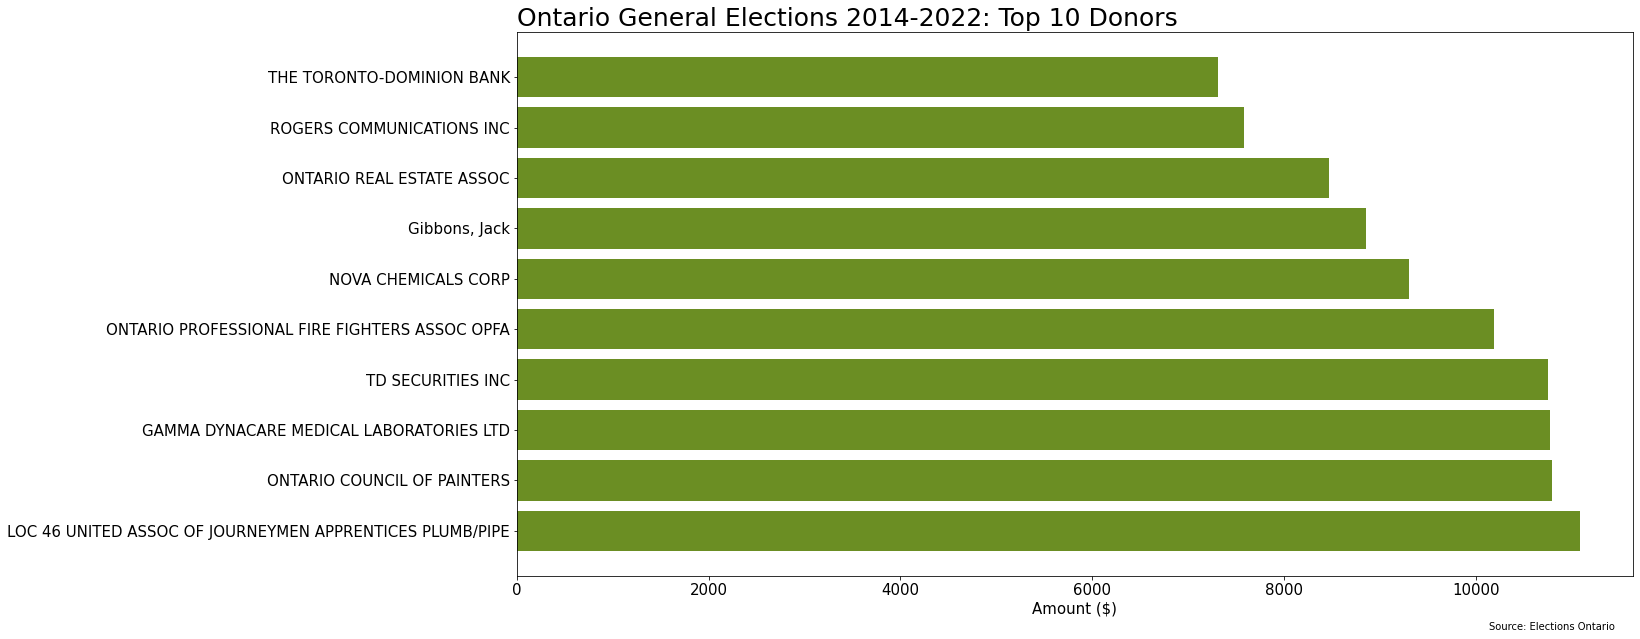

In [58]:
#Identify top 10 donors

#sort df by Contributor and Amount
donor10=df.groupby(['Contributor'], as_index=False)[['Amount']].sum().sort_values(by='Amount', ascending=False).head(10)

#plot data
fig = plt.figure(figsize = (20, 10))
plt.barh(donor10['Contributor'], donor10['Amount'], color='olivedrab')
plt.xlabel('Amount ($)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Ontario General Elections 2014-2022: Top 10 Donors", fontsize=25, loc='left')
plt.gcf().text(0.8,0.05, "Source: Elections Ontario", fontsize=10)

In [ ]:
# seeing which party these top donors gave to
# donor10to= df.groupby(['Contributor','Party.Abbreviation'], as_index=False)[['Amount']].sum().sort_values(by='Amount', ascending=False)
# top10list = ['THE TORONTO-DOMINION BANK','ROGERS COMMUNICATIONS INC','ONTARIO REAL ESTATE ASSOC','Gibbons, Jack',
#                 'NOVA CHEMICALS CORP','ONTARIO PROFESSIONAL FIRE FIGHTERS ASSOC OPFA','TD SECURITIES INC','GAMMA DYNACARE MEDICAL LABORATORIES LTD','ONTARIO COUNCIL OF PAINTERS','LOC 46 UNITED ASSOC OF JOURNEYMEN APPRENTICES PLUMB/PIPE']
# df2 = donor10to[donor10to['Contributor'].isin(top10list)]
# df2.groupby(['Contributor','Party.Abbreviation'])['Amount'].sum().unstack('Party.Abbreviation')

# df2

Text(0.8, 0.05, 'Source: Elections Ontario')

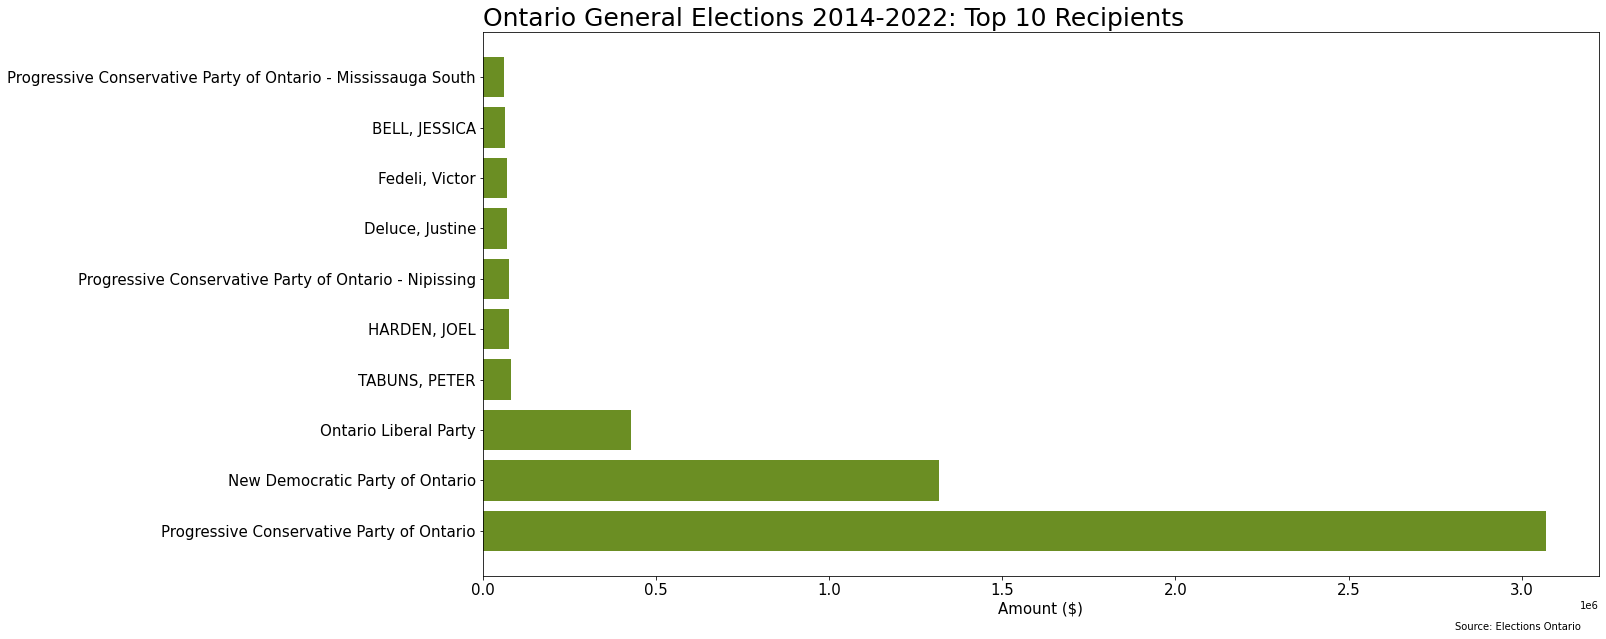

In [55]:
#Identify top 10 recipients

#sort df by Contributor and Amount
recip10=df.groupby(['Recipient'], as_index=False)[['Amount']].sum().sort_values(by='Amount', ascending=False).head(10)

#plot data
fig2 = plt.figure(figsize = (20, 10))
plt.barh(recip10['Recipient'], recip10['Amount'], color='olivedrab')
plt.xlabel('Amount ($)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Ontario General Elections 2014-2022: Top 10 Recipients", fontsize=25, loc='left')
plt.gcf().text(0.8,0.05, "Source: Elections Ontario", fontsize=10)